<a href="https://colab.research.google.com/github/GNuSeekK/ICTCOG/blob/main/4_10_%5BTensorflow%5D_Keras%EB%A1%9C_MNIST_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8%EB%A7%81_%EC%88%98%ED%96%89%ED%95%98%EA%B8%B0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras
텐서플로우 프레임워크를 기반으로 자주 사용하는 딥러닝 레이어들을 모아놓은 패키지

# Tensorflow Framework의 특징
* *Tensor*(배열)이 *Flow*(흐른다)
* 미리 계산 그래프를 만들어 놓고 그 그래프에 데이터들(*Tensor*)을 흘려 보낸다

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets

import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 이미지를 가져왔으니 시각화 해보고, 형상(shape) 확인하기
image = X_train[0]
image.shape

(28, 28)

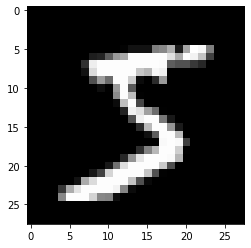

In [ ]:
plt.imshow(image, cmap = 'gray')
plt.show()

In [ ]:
# 이미지를 CNN 레이어에 집어 넣기 위해서는 4차원 형태를 유지
# (N,H,W,C) -> (데이터 개수, 높이, 가로, 채널)
# MNIST 손글씨 이미지 : 높이 - 28px, 가로 - 28px, 채널 - 1 -> (N, 28, 28, 1)

# tf.newaxis == np.newaxis
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

# Conv2D 레이어 사용

* *filters* : 필터의 개수 ($C_{out}$)
* *kernel_size* : 필터의 크기 ($k_{H}, k_{W}$)
* *strides* : 몇 개의 픽셀을 스킵 하면서 필터가 훑게 할지 결정 (기본 1)
* *padding* : `0`으로 쌓여진 패딩을 만들 것인가에 대한 결정
    * `VALID` : 패딩 생성 X
    * `SAME` : 패딩 생성 O ( 1줄의 패딩 추가)
* `activation` : 활성화 함수 지정하기, 따로 설정하지 않고 추후 레이어로 추가 가능


In [ ]:
# 케라스를 이용해서 합성곱 레이어를 직접 만들어 보기
# from tensorflow.keras.layers import Conv2D
tf.keras.layers.Conv2D(
    filters=3, # 필터 개수
    # kernel_size = (3,3) # 필터의 세로, 필터의 가로, 필터의 가로 세로 크기가 똑같다면 스칼라로 넣어도 된다.
    kernel_size = 3,
    # strides = (1,1), # 가로 이동방향, 세로 이동방향의 크기 스칼라로 넣어주면 가로, 세로가 똑같이 설정 된다.
    strides = 1,
    # padding = 'VALID' # 패딩 사용하지 않기
    padding = 'SAME', # 패딩 사용하기
    activation = 'relu' #활성화 함수 사용 (레이어로 추가해도 된다.)
)

Conv2D 레이어에 데이터를 집어 넣을 때는 (N, H, W, C)의 형식으로 넣어줘야 한다.

In [ ]:
image = tf.cast(image, dtype=tf.float32) # numpy 배열을 텐서플로우 배열화

layer = tf.keras.layers.Conv2D(
    filters = 5,
    kernel_size = 3,
    strides = 1,
    padding = 'SAME'

)

In [ ]:
# 텐서플로우의 레이어에 데이터를 전달할 때는 객체를 함수처럼 사용하면 된다!
output = layer(image)
# 1채널 데이터가 5채널이 된다. [1, 28, 28, 5]
output.shape

TensorShape([1, 28, 28, 5])

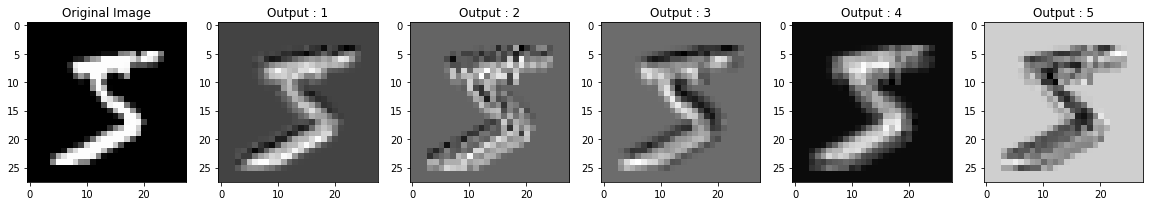

In [ ]:
# MNIST 이미지 5에 대한 Conv2D 레이어 통과 후 시각화

_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20,10))
axes[0].imshow(image[0,...,0], cmap='gray')
axes[0].set_title('Original Image')

for idx, ax in enumerate(axes[1:]):
    ax.set_title(f'Output : {idx + 1}')
    ax.imshow(output[0,...,idx], cmap='gray')

plt.show()

# Filter 시각화 하기

* CNN에서 Filter의 역할은 실제 CNN 레이어가 이미지의 무엇을 보고 있는가를 이야기 한다.
* keras의 레이어들은 get_weight() 함수를 이용해서 편향과 가중치를 볼 수 있다.
* 필터의 모양 : ($k_{h}, k_{W}, C_{in}, C_{out}$)

In [ ]:
# 계산 가능한 레이어에서 매개변수 뽑아내기(가중치, 편향)
# layer - Conv2D 레이어 필터 모양 : (3, 3, 1, 5) - (필터 세로, 필터 가로, 채널 수, 필터 개수)
weights = layer.get_weights()

In [ ]:
print(f'가중치의 형상 : {weights[0].shape}')
print(f'편향의 형상 : {weights[1].shape}')

가중치의 형상 : (3, 3, 1, 5)
편향의 형상 : (5,)


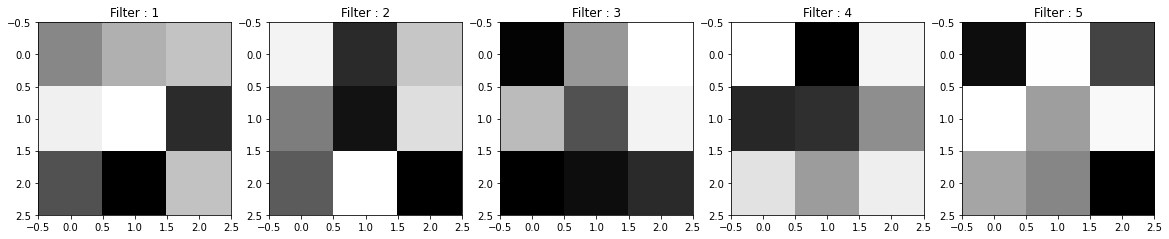

In [ ]:
# 시각화
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))

for idx, ax in enumerate(axes):
  ax.set_title("Filter : {}".format(idx + 1))
  ax.imshow(weights[0][..., 0, idx], cmap='gray')

plt.show()

CNN 레이어의 학습은 필터를 학습시키는 것

# ReLU 레이어 시각화
* 이미지 분석에서 `ReLU`가 자주 사용된다.
* 이미지 데이터에서 음수 데이터는 필요가 없는 데이터이다.
  * 필요 없는 음수 데이터는 제거하고, 의미 있는 양수 데이터만 강조하기 위해서 `ReLU`가 일반적으로 사용된다.

In [ ]:
import numpy as np
np.min(output), np.max(output)

(-126.7792, 260.0071)

In [ ]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output) # 출력 특징 맵이 활성화 레이어로 들어간다.
act_output.shape # output의 형상과 똑같다.

TensorShape([1, 28, 28, 5])

In [ ]:
np.min(act_output), np.max(act_output)

(0.0, 260.0071)

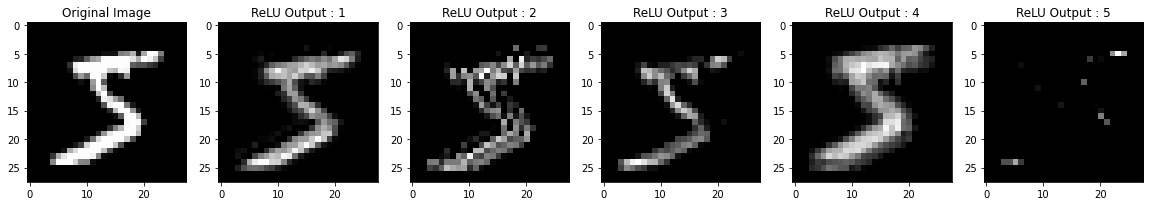

In [ ]:
# ReLU 레이어를 통과 시키고 나서의 결과
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1: ]):
  ax.set_title("ReLU Output : {}".format(idx + 1))
  ax.imshow(act_output[0, ..., idx], cmap='gray')

plt.show()

# MaxPooling 레이어 확인하기


In [ ]:
# strides 1 일 때 padding='same'이면 입력 데이터의 크기와 출력 데이터의 크기가 똑같아 진다.
# strides 2 이상이면 모서리 부분에 일부분의 데이터만 있을 경우 padding='valid'이면 해당 데이터는 버려지지만,
#'same'인 경우에는 데이터가 없는 부분에만 padding이 생겨 데이터의 손실을 막는다.

pool_layer = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), # 필터의 개념과 같다.
    strides=(2, 2),
    padding='SAME'
)

pool_output = pool_layer(act_output)
pool_output.shape

TensorShape([1, 14, 14, 5])

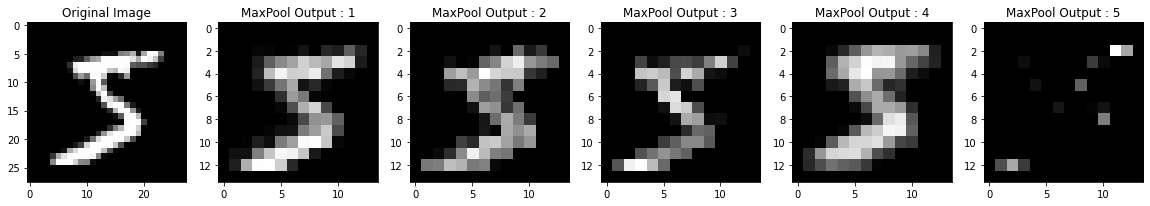

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1: ]):
  ax.set_title("MaxPool Output : {}".format(idx + 1))
  ax.imshow(pool_output[0, ..., idx], cmap='gray')

plt.show()